In [4]:
# !pip install missingno

  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [1]:
# data 불러오기
socar_rd = pd.read_csv("../../../insurance_fraud_detect_data.csv")
socar_rd.columns = ["c_"+str(i) for i in range(1,26)]
socar_rd.head(2)

,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,...,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1


In [2]:
# 모두 16000 non-null
socar_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c_1     16000 non-null  int64  
 1   c_2     16000 non-null  int64  
 2   c_3     16000 non-null  int64  
 3   c_4     16000 non-null  int64  
 4   c_5     16000 non-null  int64  
 5   c_6     16000 non-null  int64  
 6   c_7     16000 non-null  int64  
 7   c_8     16000 non-null  int64  
 8   c_9     16000 non-null  int64  
 9   c_10    16000 non-null  int64  
 10  c_11    16000 non-null  int64  
 11  c_12    16000 non-null  int64  
 12  c_13    16000 non-null  int64  
 13  c_14    16000 non-null  int64  
 14  c_15    16000 non-null  float64
 15  c_16    16000 non-null  int64  
 16  c_17    16000 non-null  int64  
 17  c_18    16000 non-null  int64  
 18  c_19    16000 non-null  int64  
 19  c_20    16000 non-null  int64  
 20  c_21    16000 non-null  int64  
 21  c_22    16000 non-null  int64  
 22

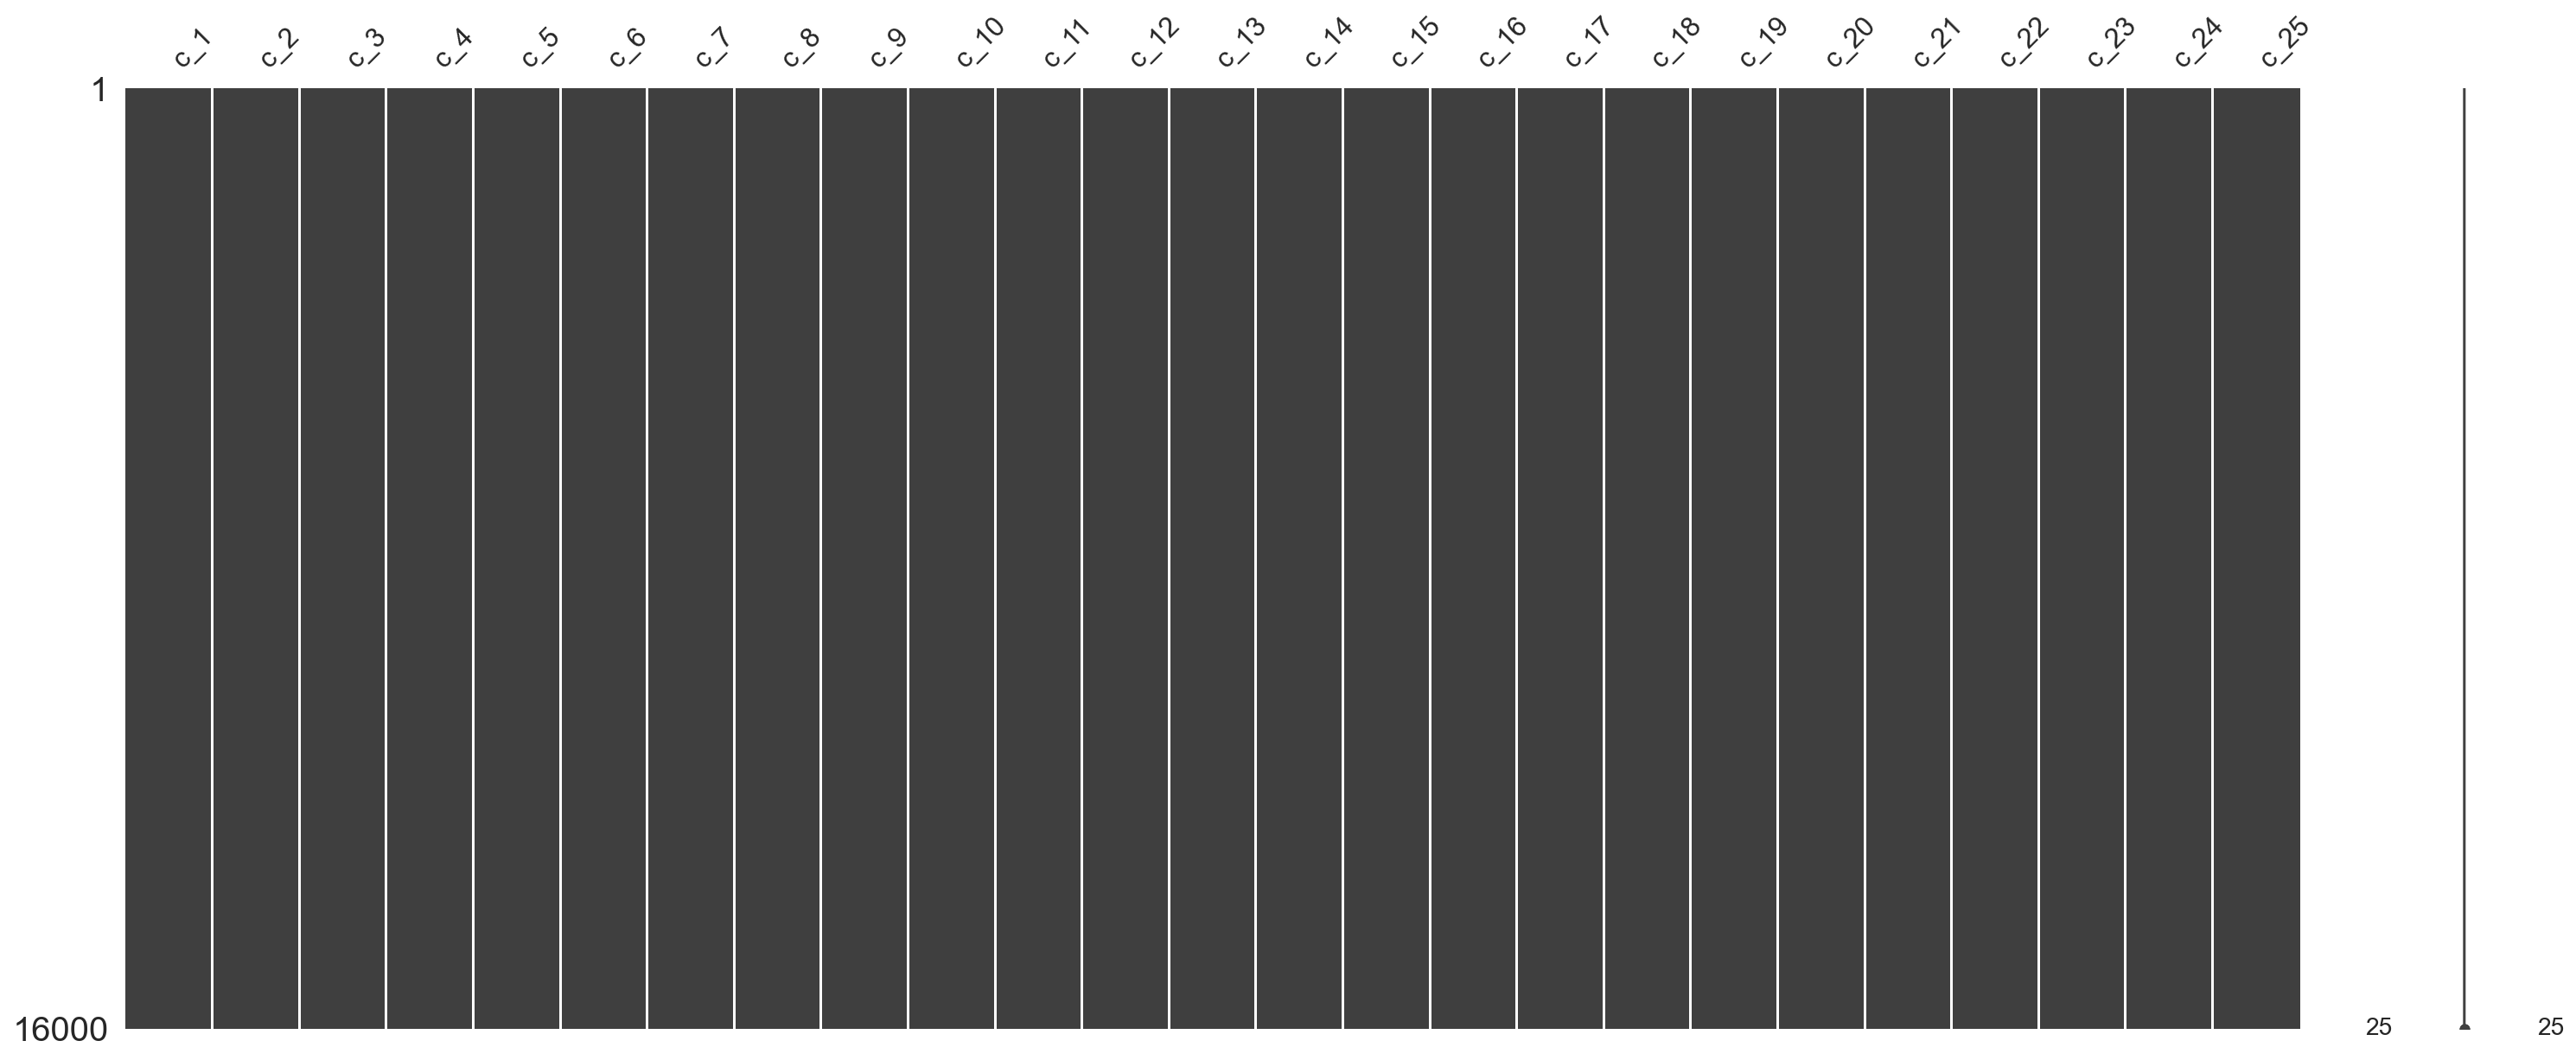

In [3]:
# missingno로 확인결과 null 없어보임
msno.matrix(socar_rd);

In [4]:
# 알고보니 null다른 값으로 대체하는 가공이 이미 진행된 데이터
# null의 대체값이 어떤 열은 0이고 어떤 열은 -1인데, 칼럼별로 분리 필요 예상
socar_rd[socar_rd==0].count()

c_1     15959
c_2         0
c_3     13751
c_4         0
c_5     14635
c_6         0
c_7     15895
c_8      1364
c_9         0
c_10    13394
c_11    14719
c_12        0
c_13        0
c_14        0
c_15     6006
c_16    10424
c_17     4778
c_18    10731
c_19    13228
c_20      271
c_21    11384
c_22    11325
c_23    11328
c_24     1997
c_25    12879
dtype: int64

In [5]:
# test_size는 0.2 정도
socar_rd["c_25"].value_counts()

0    12879
1     3121
Name: c_25, dtype: int64

In [6]:
# 비대칭 데이터. 일단 EDA는 train~test 구분없이 진행
socar_rd.c_1.value_counts()

0    15959
1       41
Name: c_1, dtype: int64

In [7]:
# fraud = YES와 NO별로 구분해서 특징 파악
fraud_yes = socar_rd[socar_rd["c_1"]==1]
fraud_no = socar_rd[socar_rd["c_1"]==0]

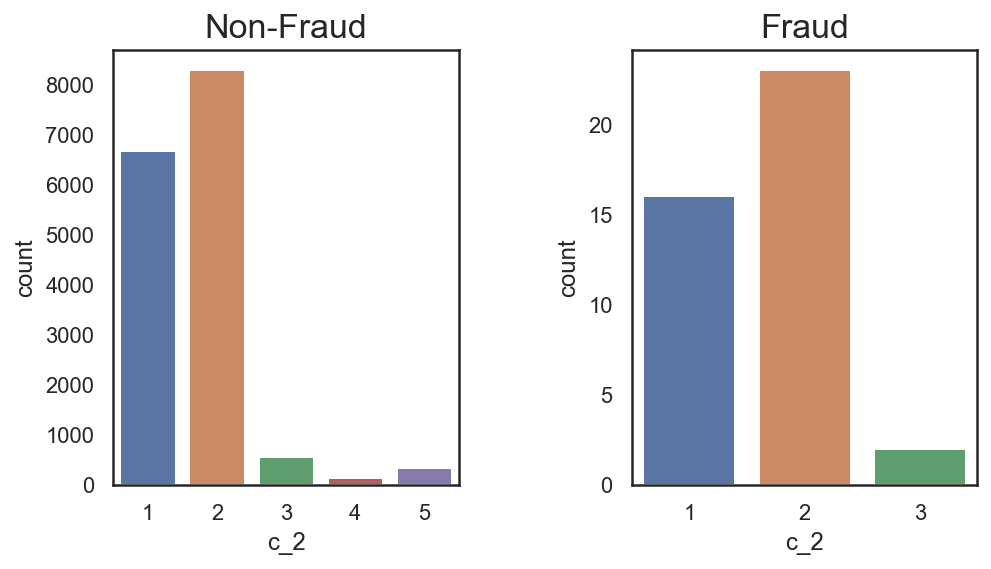

In [8]:
# c_2 ->소수의 4,5 말고는 유의미한 차이는 보이지 않음
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_2"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_2"], ax=ax[1])
plt.show()

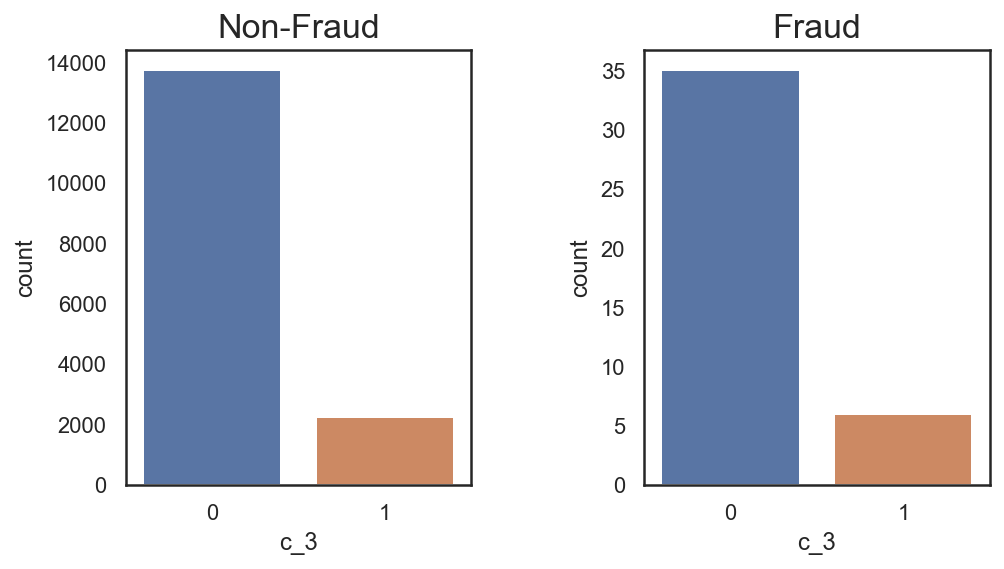

In [9]:
# c_3 -> 매우 비슷한 비율
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_3"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_3"], ax=ax[1])
plt.show()

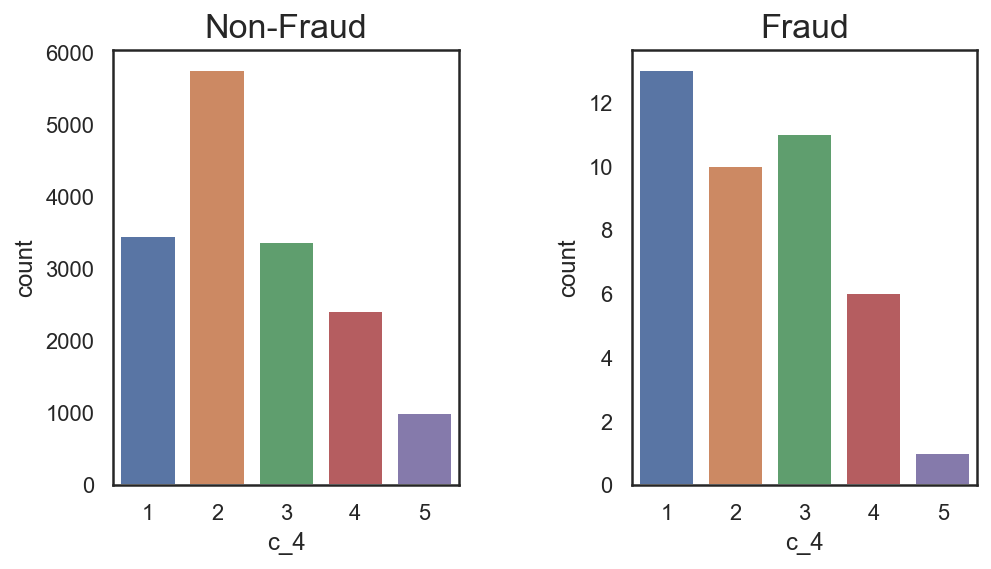

In [10]:
# c_4 -> fraud 군에서 1,3의 비율이 비교적 높게 나타남
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_4"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_4"], ax=ax[1])
plt.show()

In [11]:
pd.merge(round(fraud_no["c_4"].value_counts() / len(fraud_no) * 100, 2),
         round(fraud_yes["c_4"].value_counts() / len(fraud_yes) * 100, 2),
         left_index=True, right_index=True,
        ).sort_index()

,c_4_x,c_4_y
1,21.56,31.71
2,35.99,24.39
3,21.09,26.83
4,15.12,14.63
5,6.25,2.44


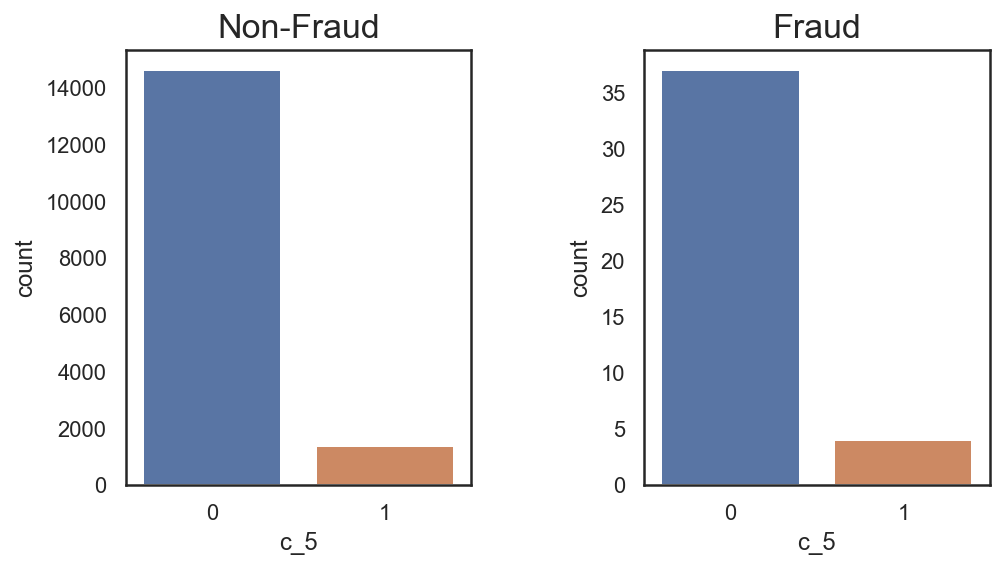

In [12]:
# c_5 -> 거의 유사함
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_5"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_5"], ax=ax[1])
plt.show()

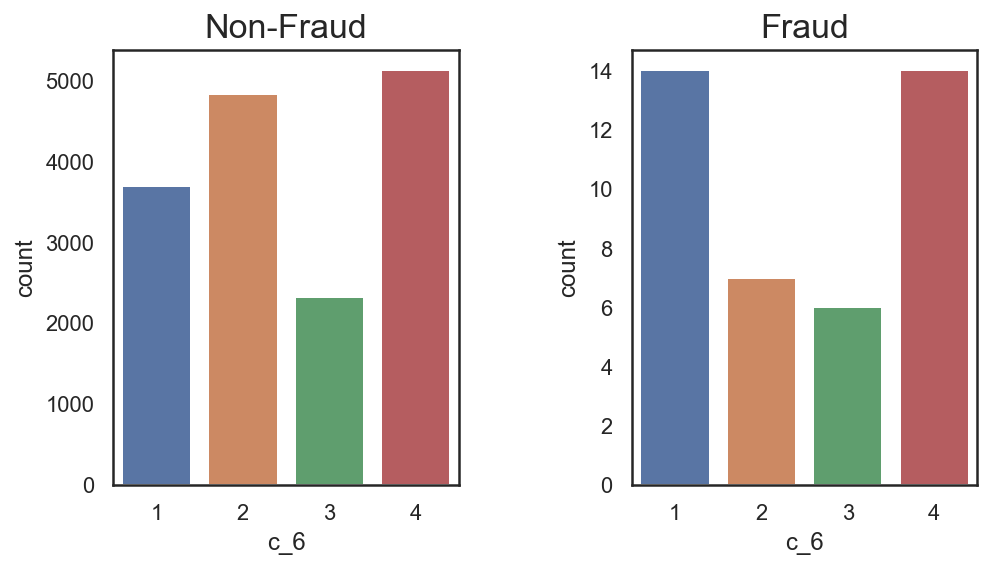

In [13]:
# c_6 -> fraud 군에서 양극화되는 모습 나타남
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_6"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_6"], ax=ax[1])
plt.show()

In [14]:
pd.merge(round(fraud_no["c_6"].value_counts() / len(fraud_no) * 100, 2),
         round(fraud_yes["c_6"].value_counts() / len(fraud_yes) * 100, 2),
         left_index=True, right_index=True,
        ).sort_index()

,c_6_x,c_6_y
1,23.15,34.15
2,30.26,17.07
3,14.52,14.63
4,32.07,34.15


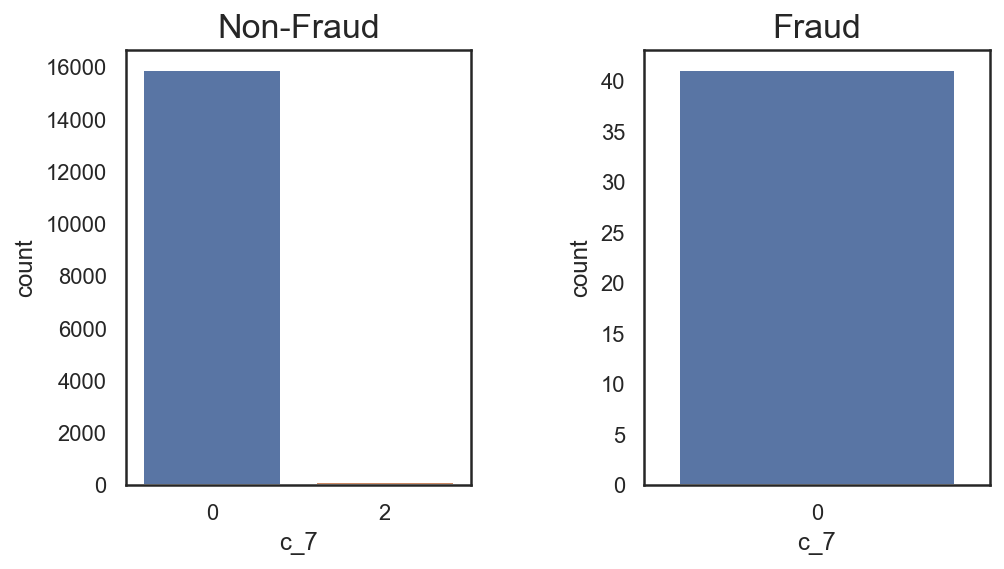

In [15]:
# c_7 -> fraud군은 단일값 존재 -> 학습에 유의미하지 않을 것으로 예상
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_7"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_7"], ax=ax[1])
plt.show()

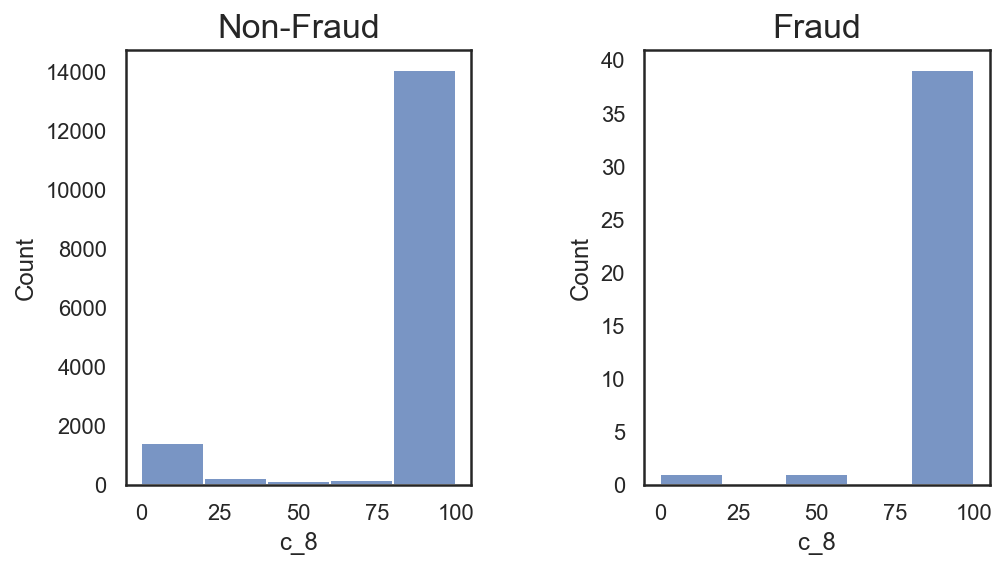

In [16]:
# c_8 -> 비율차이가 조금 있기는 하나 둘 다 공통적으로 100이 절대다수인 모습을 보임
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.histplot(x=fraud_no["c_8"], bins=5, ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.histplot(x=fraud_yes["c_8"], bins=5, ax=ax[1])
plt.show()

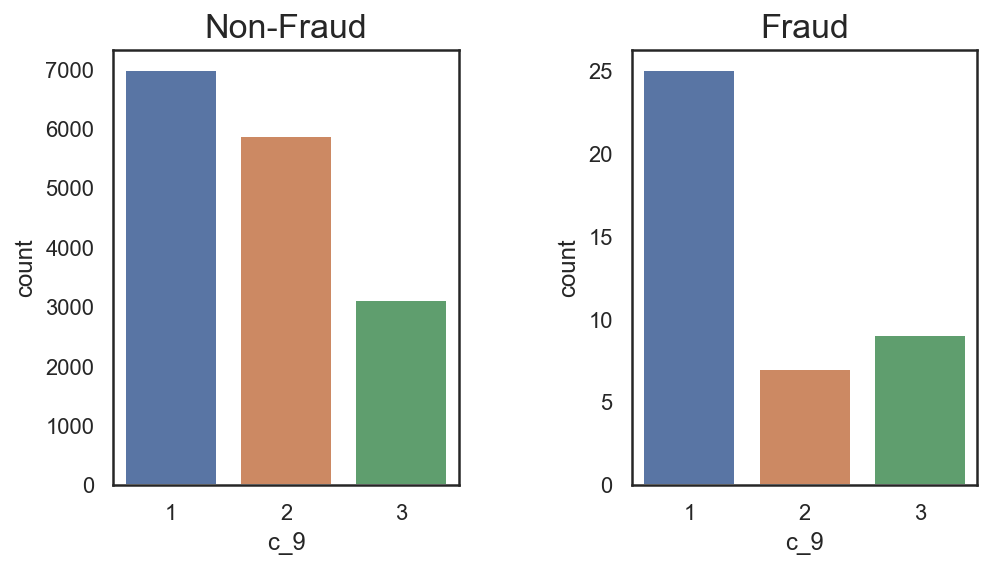

In [17]:
# c_9 -> Fraud 군의 경우, 비교적 1의 비율이 높기는 하나 2,3도 일부 존재함
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_9"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_9"], ax=ax[1])
plt.show()

In [18]:
pd.merge(round(fraud_no["c_9"].value_counts() / len(fraud_no) * 100, 2),
         round(fraud_yes["c_9"].value_counts() / len(fraud_yes) * 100, 2),
         left_index=True, right_index=True,
        ).sort_index()

,c_9_x,c_9_y
1,43.72,60.98
2,36.81,17.07
3,19.47,21.95


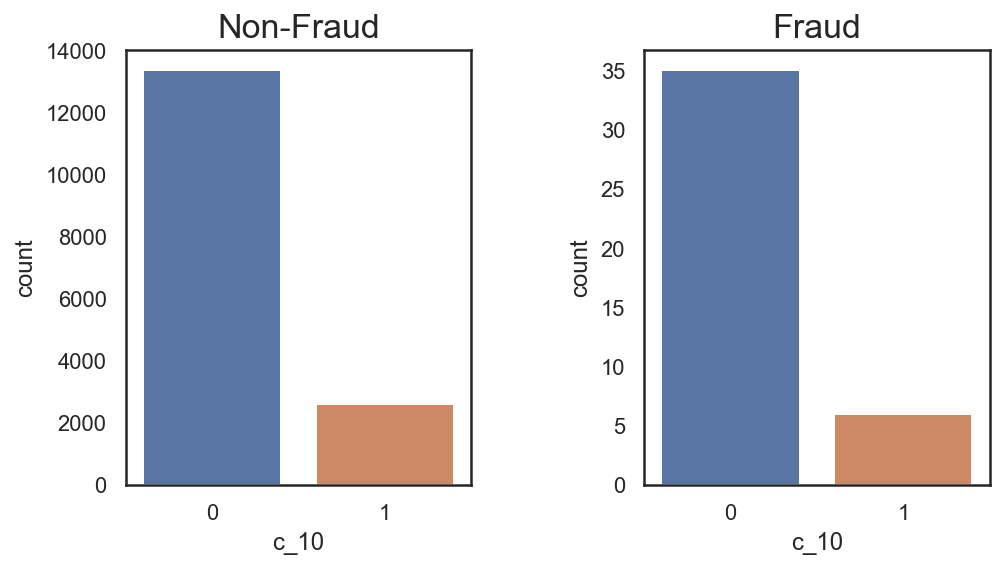

In [19]:
# c_10 -> 예상 외로 큰 차이 없이 둘 간 유사한 모습을 보임
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_10"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_10"], ax=ax[1])
plt.show()

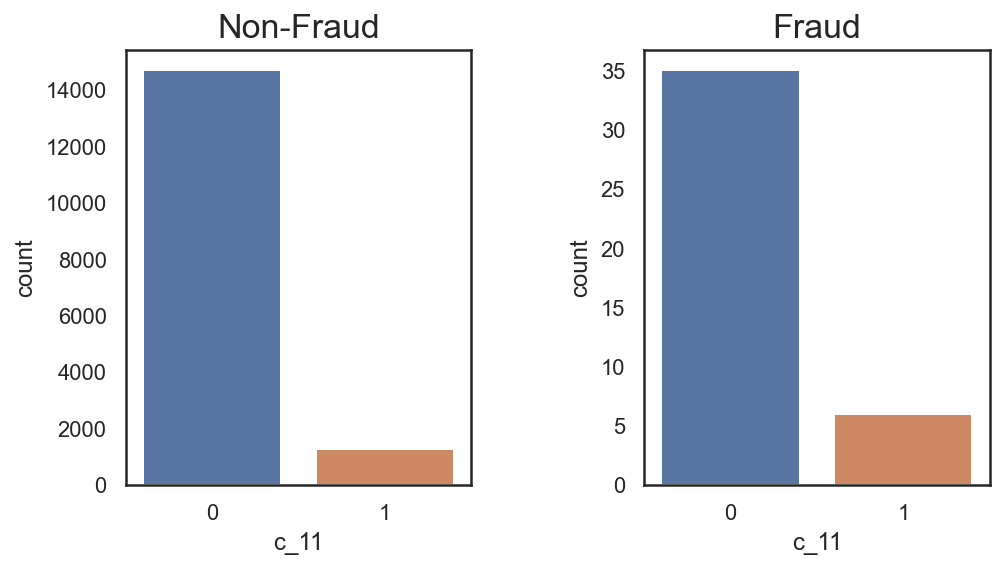

In [20]:
# c_11 -> 예상과 다르게 fraud군에서 1의 비율이 비교적 더 높게 나타남
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_11"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_11"], ax=ax[1])
plt.show()

In [21]:
pd.merge(pd.DataFrame(round(fraud_no["c_11"].value_counts() / len(fraud_no) * 100, 2),).sort_index(),
        pd.DataFrame(round(fraud_yes["c_11"].value_counts() / len(fraud_yes) * 100, 2)),
        left_index=True, right_index=True)

,c_11_x,c_11_y
0,92.01,85.37
1,7.99,14.63


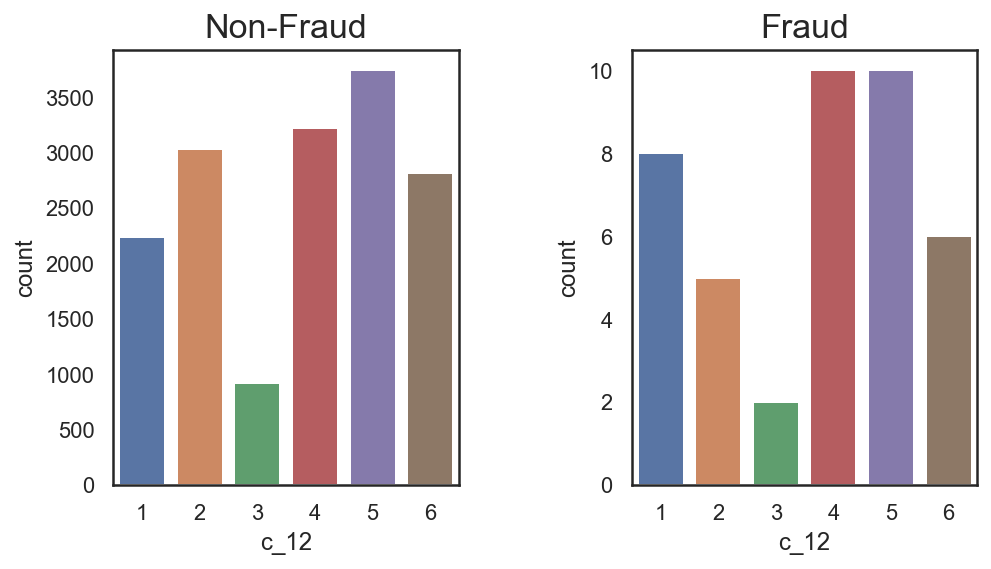

In [22]:
# c_12 -> 공통적으로 4,5에서 많은 모습을 보이는 한편, fraud 군에서는 1의 비율이 비교적 높게 나타남
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_12"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_12"], ax=ax[1])
plt.show()

In [25]:
pd.merge(round(fraud_no["c_12"].value_counts() / len(fraud_no) * 100, 2),
         round(fraud_yes["c_12"].value_counts() / len(fraud_yes) * 100, 2),
         how = 'outer', left_index= True, right_index=True,
        ).sort_index()

,c_12_x,c_12_y
1,14.00,19.51
2,19.02,12.20
3,5.73,4.88
4,20.16,24.39
5,23.44,24.39
6,17.65,14.63


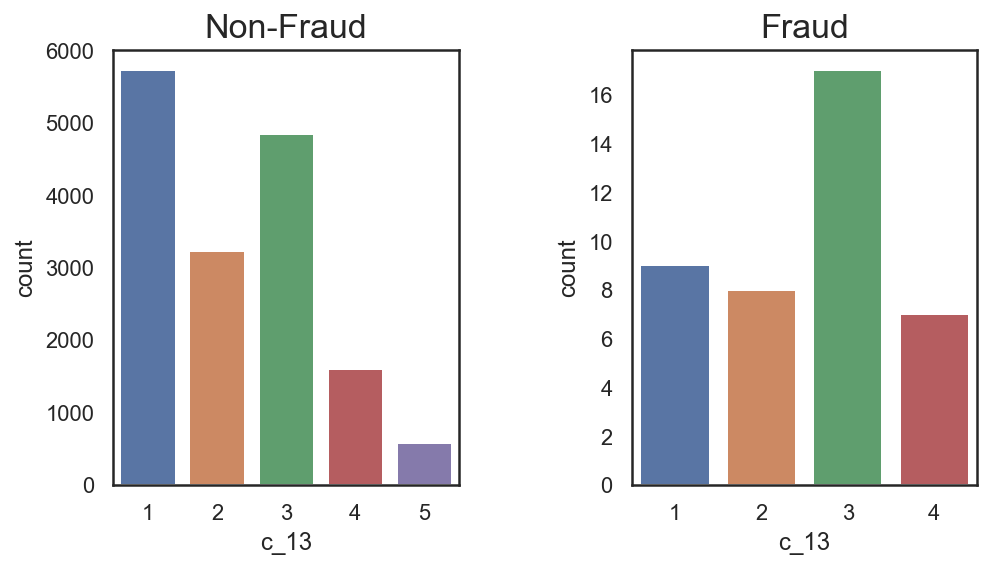

In [24]:
# c_13 -> 예상과 달리 fraud 군에서 1,2의 비중이 낮고 3의 비중이 높게 나타남
# 보험사기 패턴에 대한 재이해 필요
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_13"], ax=ax[0])


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_13"], ax=ax[1])
plt.show()

In [30]:
pd.merge(round(fraud_no["c_13"].value_counts() / len(fraud_no) * 100, 2),
         round(fraud_yes["c_13"].value_counts() / len(fraud_yes) * 100, 2),
         how = 'outer', left_index= True, right_index=True,
        ).sort_index()

,duration_x,duration_y
1,35.83,21.95
2,20.21,19.51
3,30.33,41.46
4,10.01,17.07
5,3.61,NaN


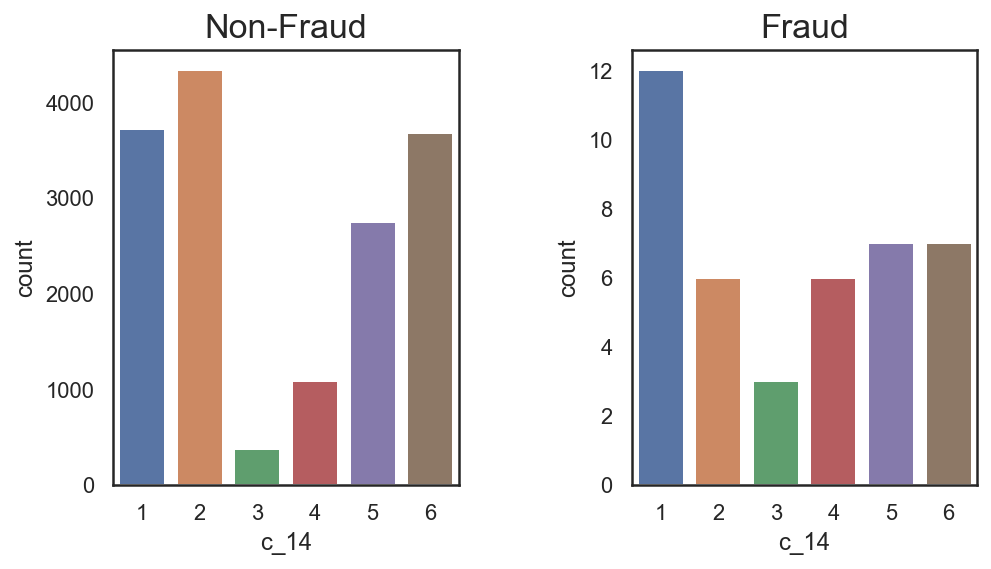

In [26]:
# c_14 -> fraud군은 1,4의 비율이 비교적 높은 반면 2의 비율은 낮게 나타남
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no[fraud_no["c_14"]!=-1]["c_14"], ax=ax[0]) # -1인 데이터 36개는 제외


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_14"], ax=ax[1])
plt.show()

In [27]:
# c_14에 대해 정상/사기로 구분하여 비율 비교
pd.merge(pd.DataFrame(round(fraud_no["c_14"].value_counts() / len(fraud_no) * 100, 2),).sort_index(),
        pd.DataFrame(round(fraud_yes["c_14"].value_counts() / len(fraud_yes) * 100, 2)),
        left_index=True, right_index=True)

,c_14_x,c_14_y
1,23.28,29.27
2,27.14,14.63
3,2.32,7.32
4,6.82,14.63
5,17.20,17.07
6,23.02,17.07


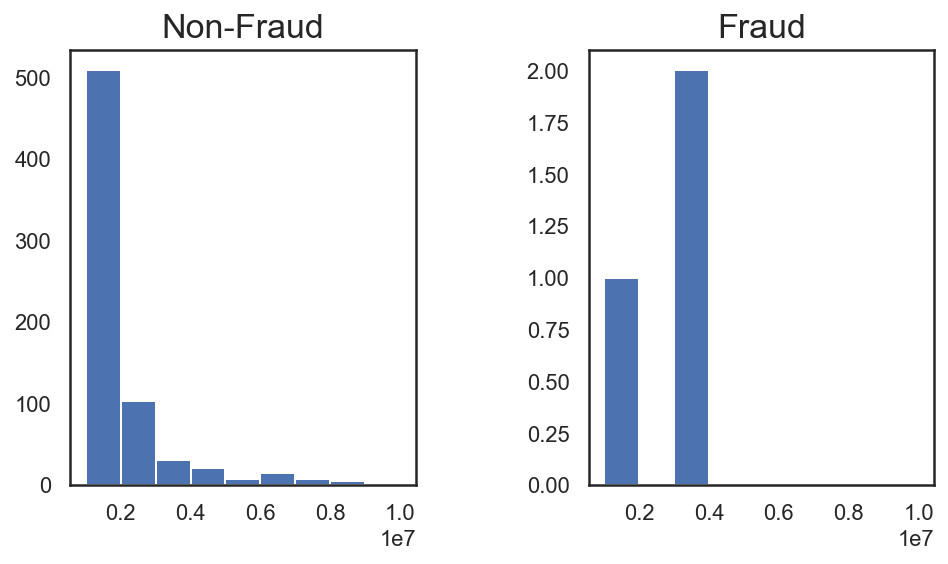

In [34]:
# c_15 -> null의 대체값인 0이 절대 다수인 상황
bins = [i*10**6 for i in range(1,11)] + [np.inf]
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
ax[0].hist(x=fraud_no["c_15"], bins=bins)

ax[1].set_title("Fraud", fontsize=17)
ax[1].hist(x=fraud_yes["c_15"], bins=bins)

plt.show()

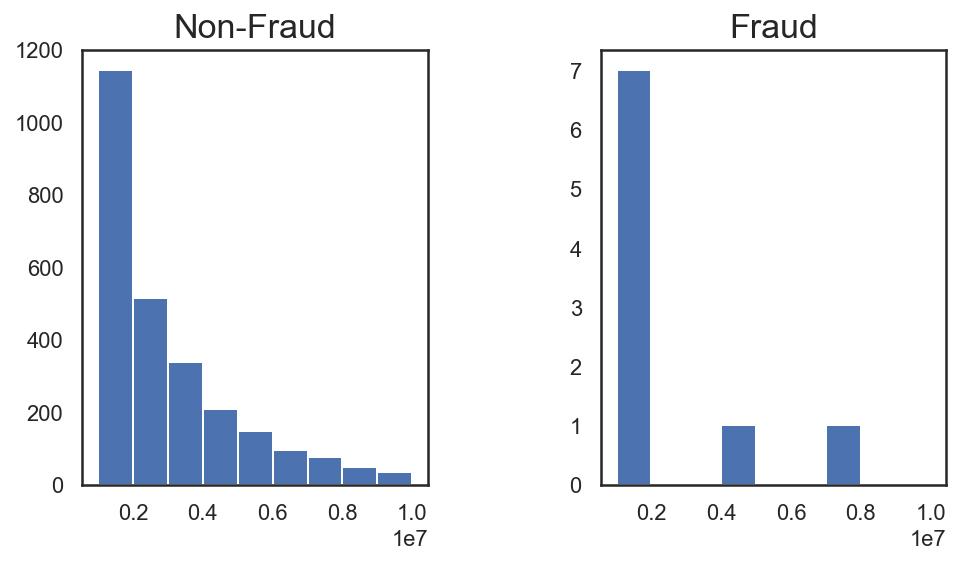

In [35]:
# c_16 -> 위와 동일하게 null의 대체값인 0이 절대 다수인 상황
bins = [i*10**6 for i in range(1,11)] + [np.inf]
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
ax[0].hist(x=fraud_no["c_16"], bins=bins)

ax[1].set_title("Fraud", fontsize=17)
ax[1].hist(x=fraud_yes["c_16"], bins=bins)

plt.show()

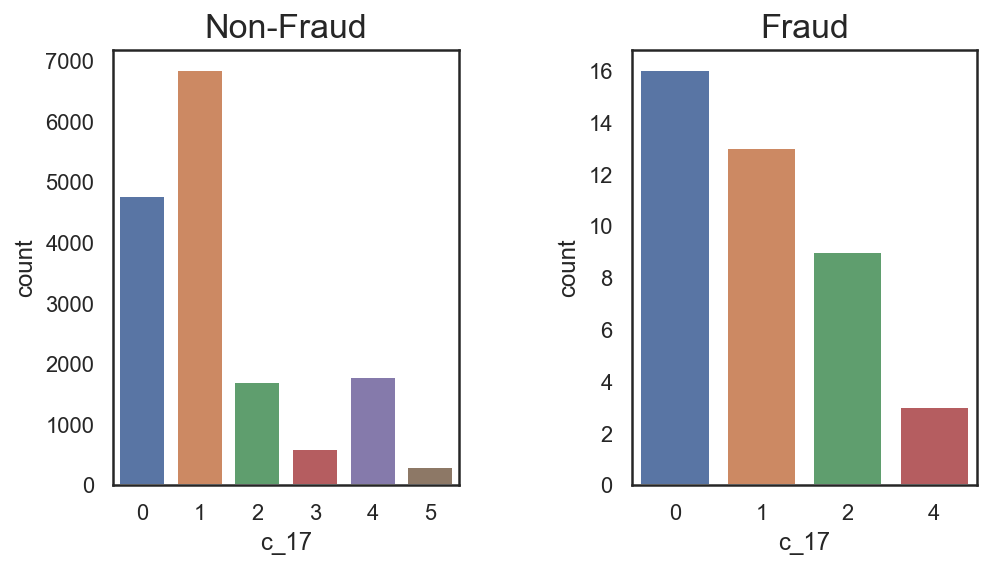

In [36]:
# c_17 -> fraud 군에서 0과 2의 비율이 비교적 높게 나타난 반면, 1의 비율은 낮게 나타남
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_17"], ax=ax[0]) 


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_17"], ax=ax[1])
plt.show()

In [37]:
# c_17에 대해 비사기/사기로 구분하여 비율 비교
pd.merge(pd.DataFrame(round(fraud_no["c_17"].value_counts() / len(fraud_no) * 100, 2),).sort_index(),
        pd.DataFrame(round(fraud_yes["c_17"].value_counts() / len(fraud_yes) * 100, 2)),
        left_index=True, right_index=True)

,c_17_x,c_17_y
0,29.84,39.02
1,42.84,31.71
2,10.66,21.95
4,11.17,7.32


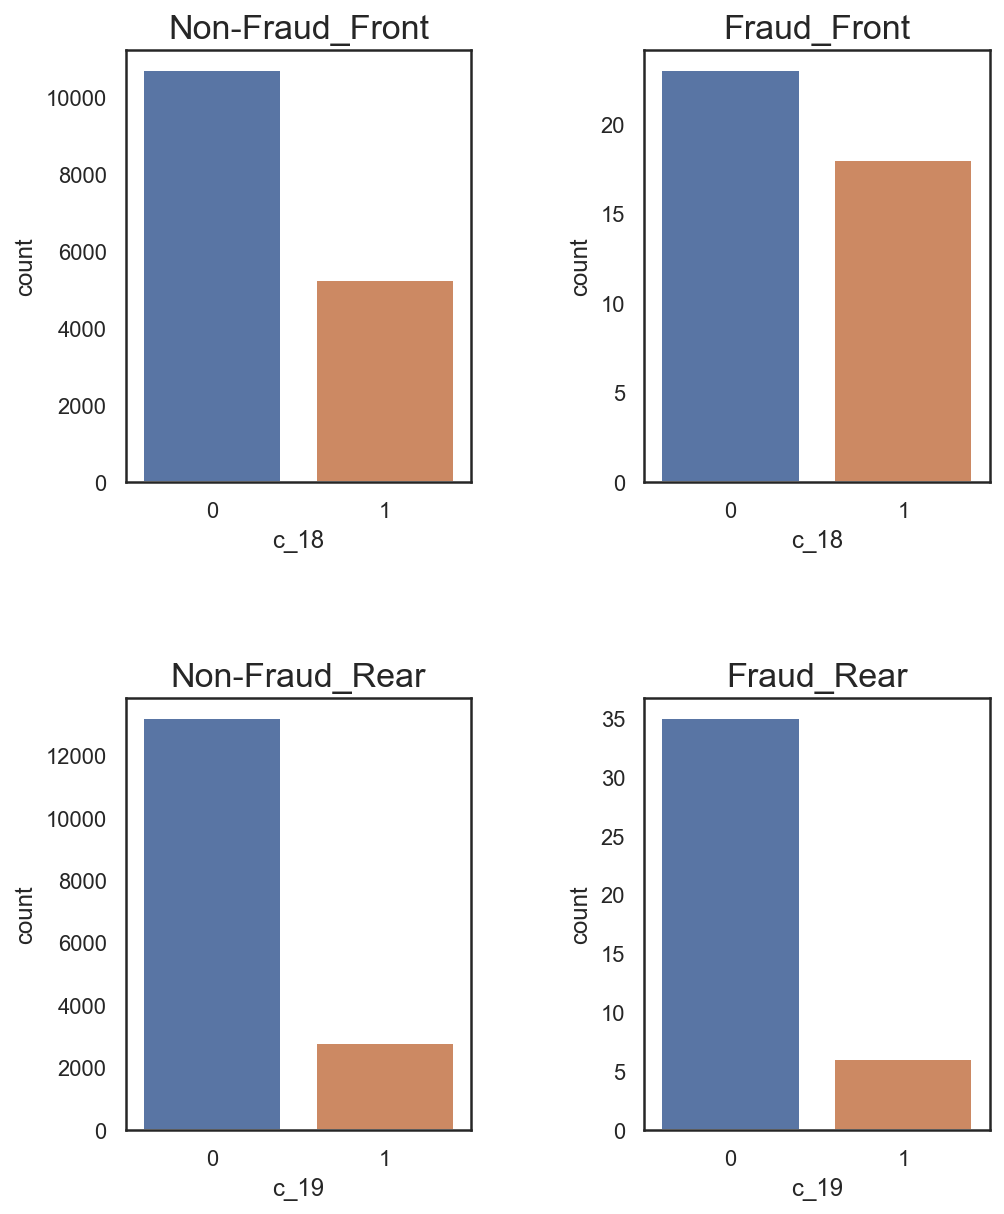

In [38]:
# c_18, c_19 -> fraud군에서 c_19 대비 c_18의 비율이 비교적 높을 것으로 예상
fig, ax = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(left=100, right=101, top=2, bottom=None, wspace=.5, hspace=.5)

ax[0,0].set_title("Non-Fraud_Front", fontsize=17)
sns.countplot(x=fraud_no["c_18"], ax=ax[0,0])

ax[1,0].set_title("Non-Fraud_Rear", fontsize=17)
sns.countplot(x=fraud_no["c_19"], ax=ax[1,0])

ax[0,1].set_title("Fraud_Front", fontsize=17)
sns.countplot(x=fraud_yes["c_18"], ax=ax[0,1])

ax[1,1].set_title("Fraud_Rear", fontsize=17)
sns.countplot(x=fraud_yes["c_19"], ax=ax[1,1])

plt.show()

In [39]:
# 정상, c_18 비율
round(fraud_no["c_18"].value_counts() / len(fraud_no["c_18"]) * 100, 2)

0    67.1
1    32.9
Name: c_18, dtype: float64

In [40]:
# fraud, c_18 비율
round(fraud_yes["c_18"].value_counts() / len(fraud_yes["c_18"]) * 100, 2)

0    56.1
1    43.9
Name: c_18, dtype: float64

In [41]:
# 정상, c_19 비율
round(fraud_no["c_19"].value_counts() / len(fraud_no["c_19"]) * 100, 2)

0    82.67
1    17.33
Name: c_19, dtype: float64

In [42]:
# fraud, c_19 비율
round(fraud_yes["c_19"].value_counts() / len(fraud_yes["c_19"]) * 100, 2)

0    85.37
1    14.63
Name: c_19, dtype: float64

In [43]:
# c_18과 c_19 중 적어도 하나라도 해당되는 비율 (정상)
round(len(fraud_no[(fraud_no["c_18"] + fraud_no["c_19"] != 0)]) / len(fraud_no) * 100, 2)

49.62

In [44]:
# c_18과 c_19 중 적어도 하나라도 해당되는 비율 (fraud)
round(len(fraud_yes[(fraud_yes["c_18"] + fraud_yes["c_19"] != 0)]) / len(fraud_yes) * 100, 2)

58.54

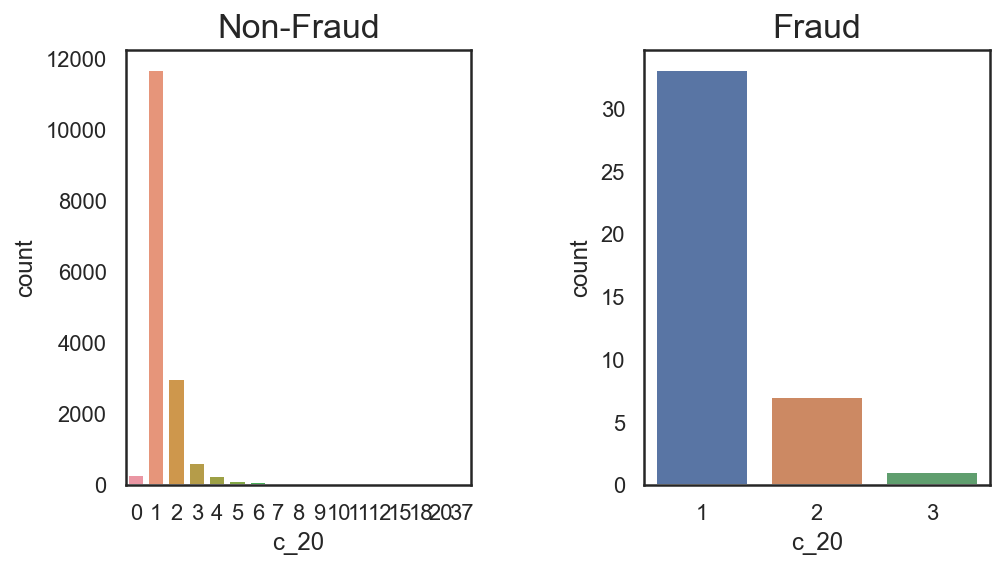

In [45]:
# c_20 -> 특이사항은 딱히 보이지 않음
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no["c_20"], ax=ax[0]) 


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes["c_20"], ax=ax[1])
plt.show()

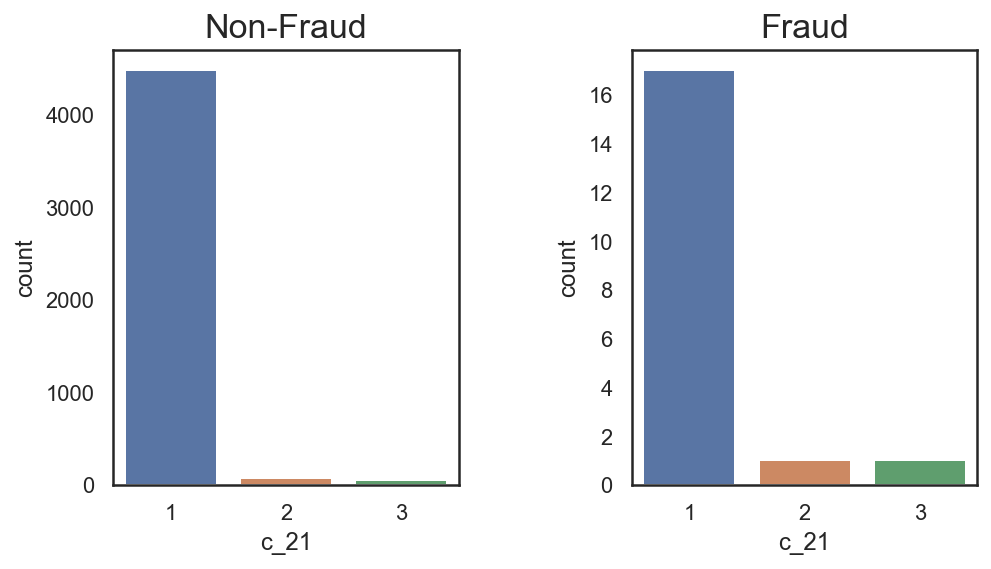

In [46]:
# c_21 -> null의 대체값인 0이 너무 많았고, 이를 제외했을 때 별다른 특이사항은 보이지 않음
fig, ax = plt.subplots(ncols=2)
plt.subplots_adjust(left=2, right=3, wspace=.5)

ax[0].set_title("Non-Fraud", fontsize=17)
sns.countplot(x=fraud_no[fraud_no["c_21"]!=0]["c_21"], ax=ax[0]) 


ax[1].set_title("Fraud", fontsize=17)
sns.countplot(x=fraud_yes[fraud_yes["c_21"]!=0]["c_21"], ax=ax[1])
plt.show()